In [27]:
#Dependancies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts
import sklearn.datasets as dta
import scipy.stats as st
import seaborn as sns

In [28]:
#Import data and verify
source_data = pd.read_csv('nueTopTens.csv', encoding = 'ISO-8859-1')
source_data.head()

,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,simplified genres
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,folk
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,hip hop
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,pop
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,pop
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,pop


In [29]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Genre'
order_of_bars = source_data.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(source_data[simplified genres].unique())-1)) for i in range(len(source_data[simplified genres].unique()))]

for c, group in zip(colors, source_data[simplified genres].unique()):
    sns.barplot(x='Users', y='Stage', data=source_data.loc[source_data[simplified genres]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-29-44d868a8984b>, line 5)

In [30]:
# ID data types
source_data.dtypes

index                 int64
title                object
artist               object
top genre            object
year                  int64
bpm                   int64
nrgy                  int64
dnce                  int64
dB                    int64
live                  int64
val                   int64
dur                   int64
acous                 int64
spch                  int64
pop                   int64
simplified genres    object
dtype: object

In [31]:
# Key data for study.
acoustic_df = pd.DataFrame(source_data, columns = ['year', 'simplified genres', 'acous', 'pop'])
acoustic_df

,year,simplified genres,acous,pop
0,2010,folk,19,83
1,2010,hip hop,24,82
2,2010,pop,10,80
3,2010,pop,0,79
4,2010,pop,2,78
...,...,...,...,...
598,2019,pop,1,75
599,2019,pop,21,75
600,2019,pop,7,70
601,2019,pop,1,69


In [32]:
#acous_avg = acoustic_df['acous'].mean
acous_pop_year = acoustic_df.groupby('year').acous.agg(['count','mean'])
acous_pop_year

,count,mean
year,,
2010,51,11.627451
2011,53,13.339623
2012,35,4.857143
2013,71,10.323944
2014,58,17.551724
2015,95,16.600000
2016,80,15.875000
2017,65,16.600000
2018,64,12.781250


Text(0.5, 0, 'Year')

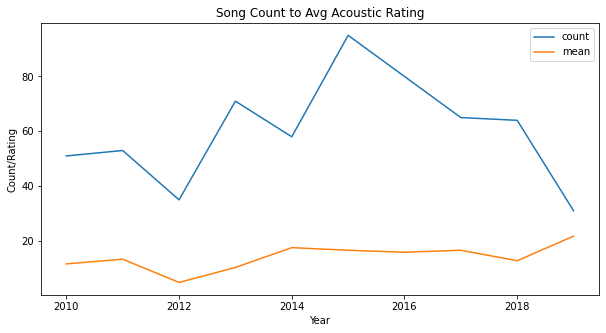

In [33]:
# Line graph to show average acoustic rating of songs over time.
raw_chart = acous_pop_year.plot(kind = 'line', title = 'Song Count to Avg Acoustic Rating', figsize = (10,5))
raw_chart.set_ylabel('Count/Rating')
raw_chart.set_xlabel('Year')

In [38]:
#Area Chart Unstacked
# Prepare Data
x = acous_pop_year['year'].values.tolist()
y1 = acous_pop_year['count'].values.tolist()
y2 = acous_pop_year['mean'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['psavert', 'uempmed']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

# Draw Tick lines  
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

KeyError: 'year'

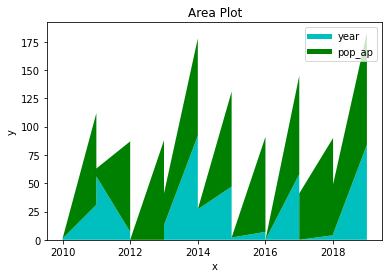

In [11]:
# Attempt to make area plot
acous_ap = acoustic_df['acous']
pop_ap = acoustic_df['pop']
time_ap = acoustic_df['year']
plt.plot([],[],color='c', label='year', linewidth=5)
plt.plot([],[],color='g', label='pop_ap', linewidth=5)
plt.stackplot(time_ap,acous_ap,pop_ap,colors=['c','g'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Area Plot')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

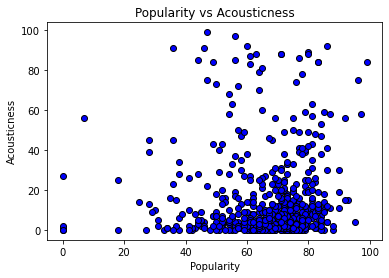

In [12]:
# Scatter plot to show relationship between Acousticness & Popularity
pop1 = acoustic_df.pop
acu1 = acoustic_df.acous
plt.scatter(acoustic_df['pop'], acoustic_df['acous'], facecolor = 'blue', edgecolor = 'black')
plt.title('Popularity vs Acousticness')
plt.ylabel('Acousticness')
plt.xlabel('Popularity')
plt.show

In [13]:
# Correlation matrix and find the strongest positive and negative correlations
source_data_corr = source_data.corr()
source_data_corr.unstack().sort_values()

nrgy   acous   -0.562287
acous  nrgy    -0.562287
val    dur     -0.262256
dur    val     -0.262256
acous  val     -0.249038
                  ...   
nrgy   nrgy     1.000000
bpm    bpm      1.000000
year   year     1.000000
spch   spch     1.000000
pop    pop      1.000000
Length: 144, dtype: float64

The r-squared is 0.0007130787091916987


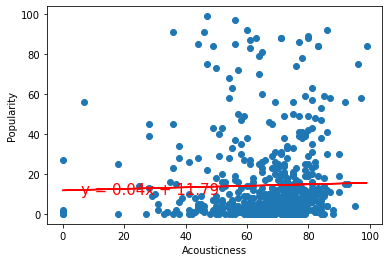

In [14]:
# Scotter plot with r squared value
x_values = acoustic_df['pop']
y_values = acoustic_df['acous']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
print(f'The r-squared is {rvalue**2}')
plt.show()

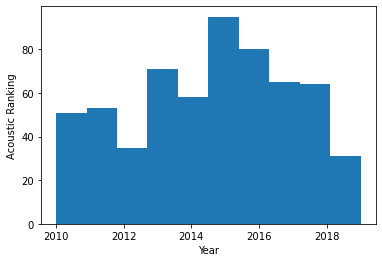

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [23]:
# Attempt to make history gram
plt.hist(acoustic_df['year'])
plt.xlabel('Year')
plt.ylabel('Acoustic Ranking')
plt.show()
print(sts.normaltest(acoustic_df.sample(50)))

<AxesSubplot:title={'center':'acous'}, xlabel='simplified genres'>

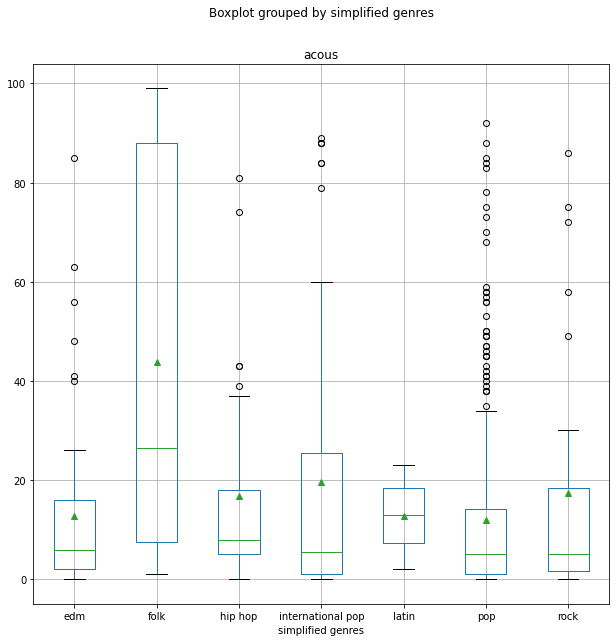

In [19]:
# Boxplot to highlight range of data
acoustic_df.boxplot('acous', by = 'simplified genres', figsize=(10,10), showmeans = True)

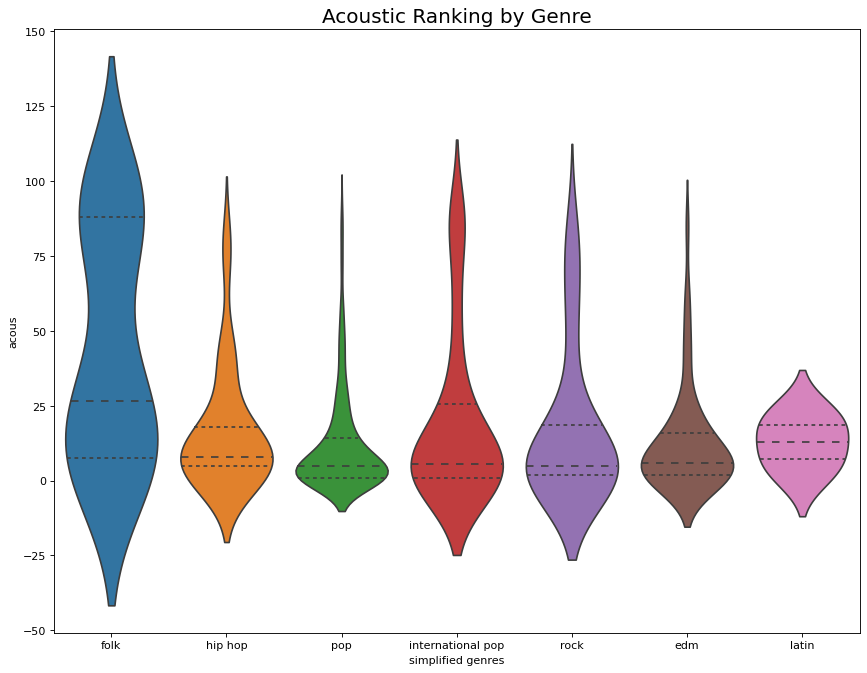

In [17]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='simplified genres', y='acous', data=acoustic_df, scale='width', inner='quartile')

# Decoration
plt.title('Acoustic Ranking by Genre', fontsize=18)
plt.show()

In [18]:
# Quartile Calculations
acoustic = acoustic_df['acous']
quartiles = acoustic.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Acousticness is: {lowerq}")
print(f"The upper quartile of Acousticness is: {upperq}")
print(f"The interquartile range of Acousticness is: {iqr}")
print(f"The the median of Acousticness is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Acousticness is: 2.0
The upper quartile of Acousticness is: 17.0
The interquartile range of Acousticness is: 15.0
The the median of Acousticness is: 6.0 
Values below -20.5 could be outliers.
Values above 39.5 could be outliers.
